# 機器學習理論與實作 HW1

## Classification

## Load data : iris data

In [1]:
import pandas as pd
from sklearn import datasets
import seaborn as sns
from sklearn import metrics

## Format data

In [2]:
data = datasets.load_iris()
iris = pd.DataFrame(data['data'], columns = data['feature_names'])
iris['target'] = data['target']        

## target 分群 : 把 target 各分為 (0,1) , (0,2) , (1,2) 一組

In [60]:
iris_01 = iris[iris['target'].isin([0,1])]
iris_02 = iris[iris['target'].isin([0,2])]
iris_12 = iris[iris['target'].isin([1,2])]

## 視覺化 (I) : target 未分群狀況下,分別對萼片長寬與花瓣長寬畫圖

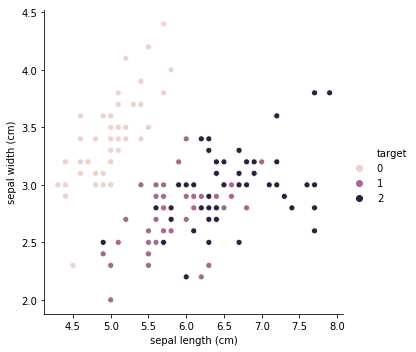

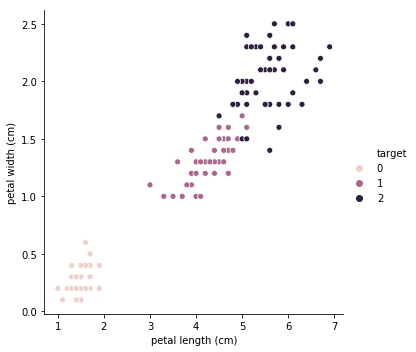

In [8]:
sns.relplot(x="sepal length (cm)", y="sepal width (cm)", hue="target", data=iris)
sns.relplot(x="petal length (cm)", y="petal width (cm)", hue="target", data=iris)

## 視覺化 (II) : target 為 (0,1) 狀況下,分別對萼片長寬與花瓣長寬畫圖

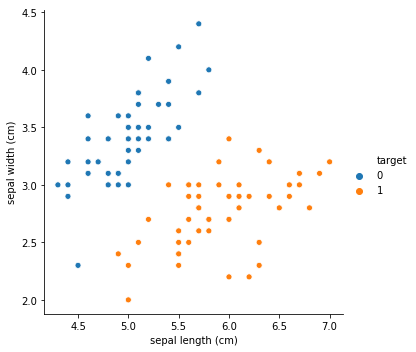

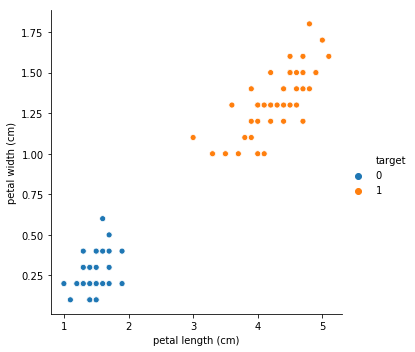

In [9]:
sns.relplot(x="sepal length (cm)", y="sepal width (cm)", hue="target", data=iris_01)
sns.relplot(x="petal length (cm)", y="petal width (cm)", hue="target", data=iris_01)

## 視覺化 (III) : target 為 (0,2) 狀況下,分別對萼片長寬與花瓣長寬畫圖

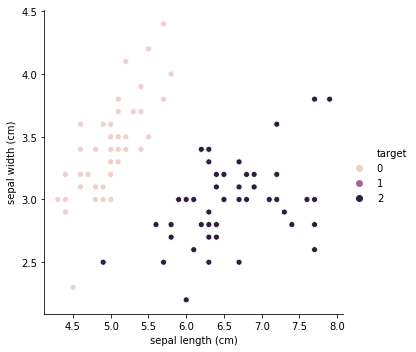

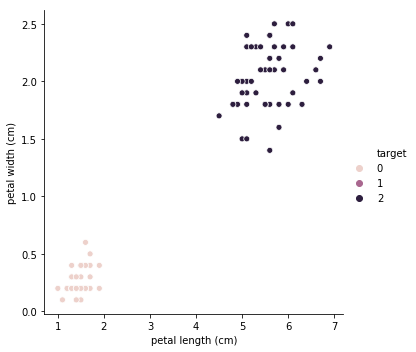

In [10]:
sns.relplot(x="sepal length (cm)", y="sepal width (cm)", hue="target", data=iris_02)
sns.relplot(x="petal length (cm)", y="petal width (cm)", hue="target", data=iris_02)

## 視覺化 (IV) : target 為 (1,2) 狀況下,分別對萼片長寬與花瓣長寬畫圖

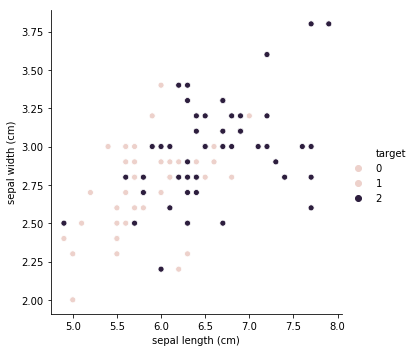

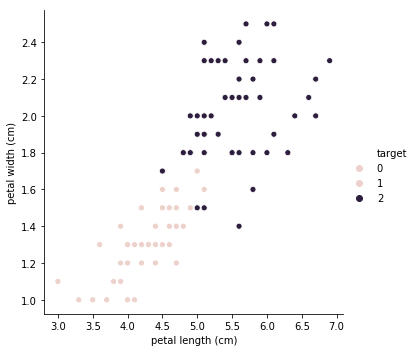

In [11]:
sns.relplot(x="sepal length (cm)", y="sepal width (cm)", hue="target", data=iris_12)
sns.relplot(x="petal length (cm)", y="petal width (cm)", hue="target", data=iris_12)

## 視覺化 (V) : target 未分群狀況下,對萼片與花瓣長寬畫出多變量圖型

C:\Users\lwanchi\AppData\Local\Continuum\anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval
C:\Users\lwanchi\AppData\Local\Continuum\anaconda3\lib\site-packages\statsmodels\nonparametric\kde.py:488: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X, a, b, gridsize) / (delta * nobs)
C:\Users\lwanchi\AppData\Local\Continuum\anaconda3\lib\site-packages\statsmodels\nonparametric\kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2
C:\Users\lwanchi\AppData\Local\Continuum\anaconda3\lib\site-packages\numpy\core\fromnumeric.py:83: RuntimeWarning: invalid value encounte

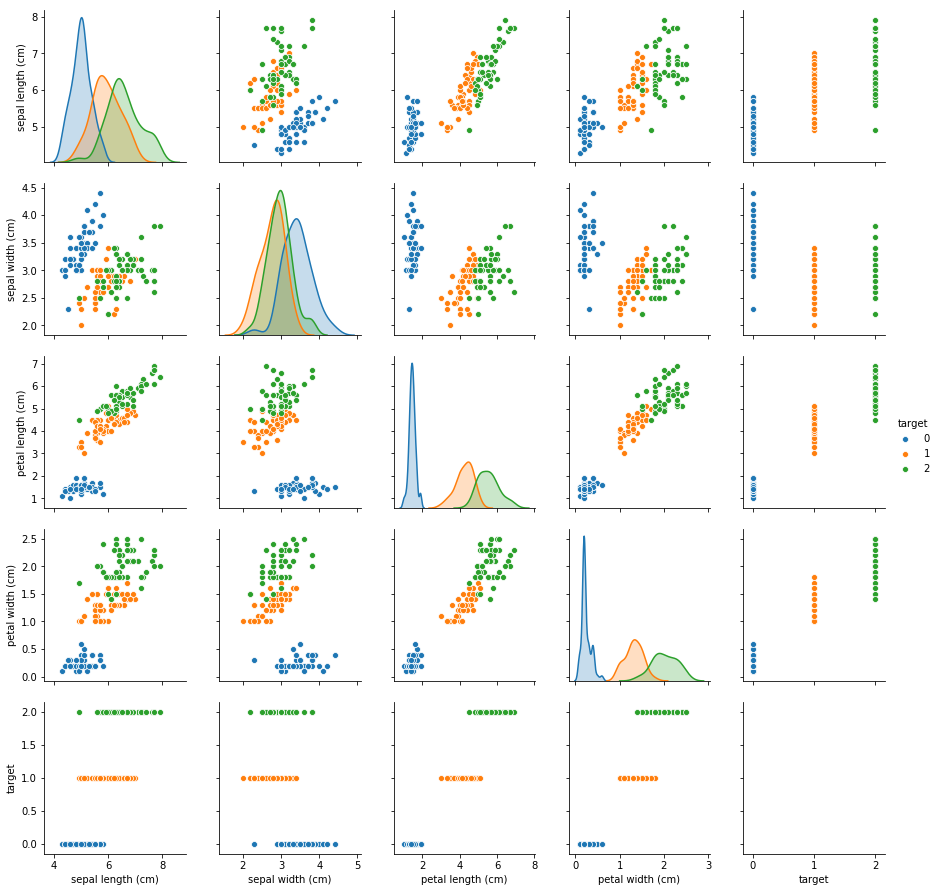

In [37]:
sns.pairplot(hue="target", data=iris.iloc[:, :5])

## 視覺化 (VI) : target 為 (0,1) 狀況下,對萼片與花瓣長寬畫出多變量圖型

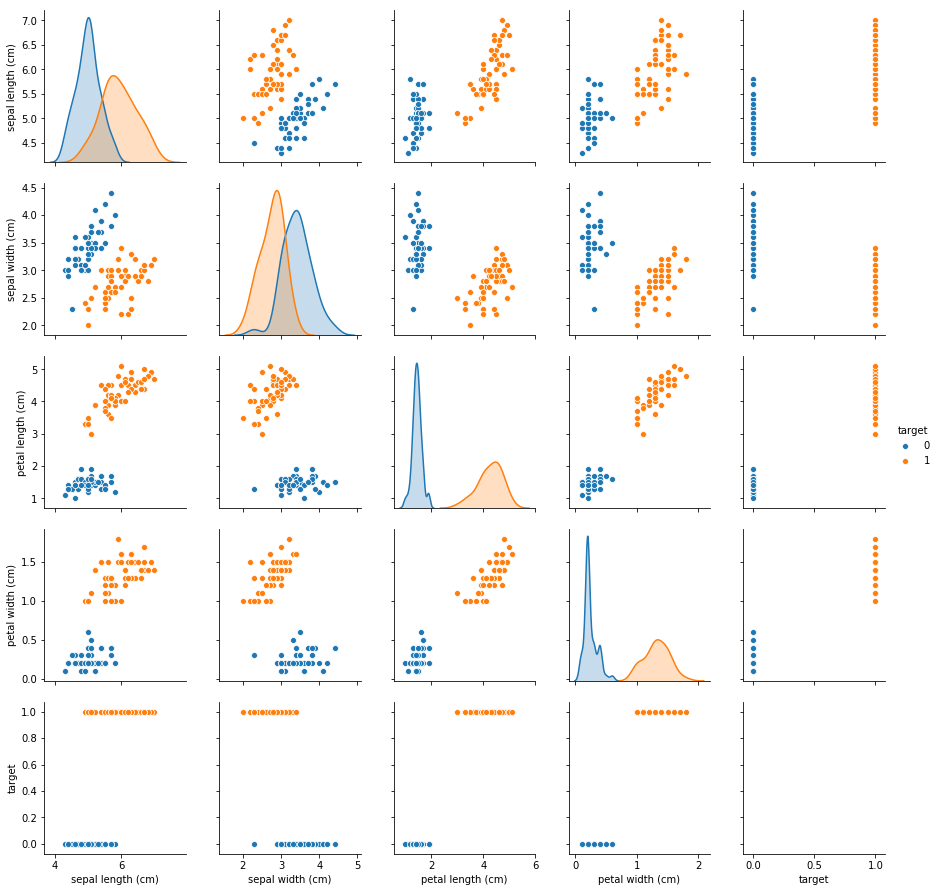

In [13]:
sns.pairplot(hue="target", data=iris_01.iloc[:, :5])

## 視覺化 (VII) : target 為 (0,2) 狀況下,對萼片與花瓣長寬畫出多變量圖型

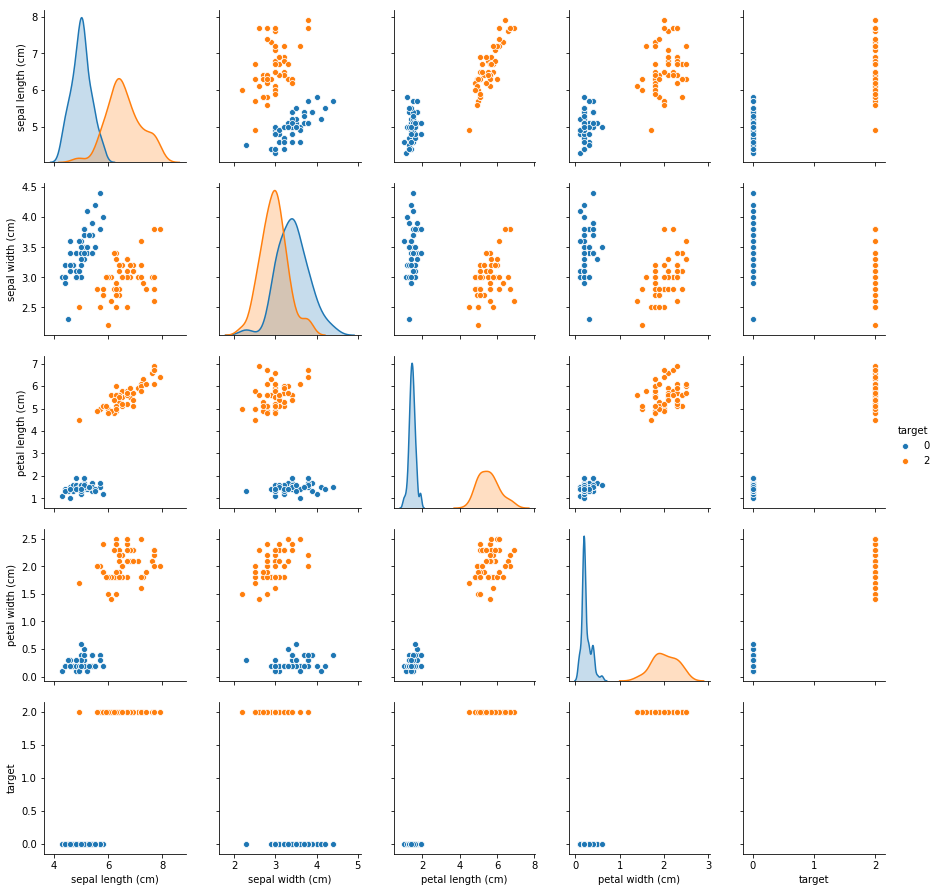

In [14]:
sns.pairplot(hue="target", data=iris_02.iloc[:, :5])

## 視覺化 (VIII) : target 為 (1,2) 狀況下,對萼片與花瓣長寬畫出多變量圖型

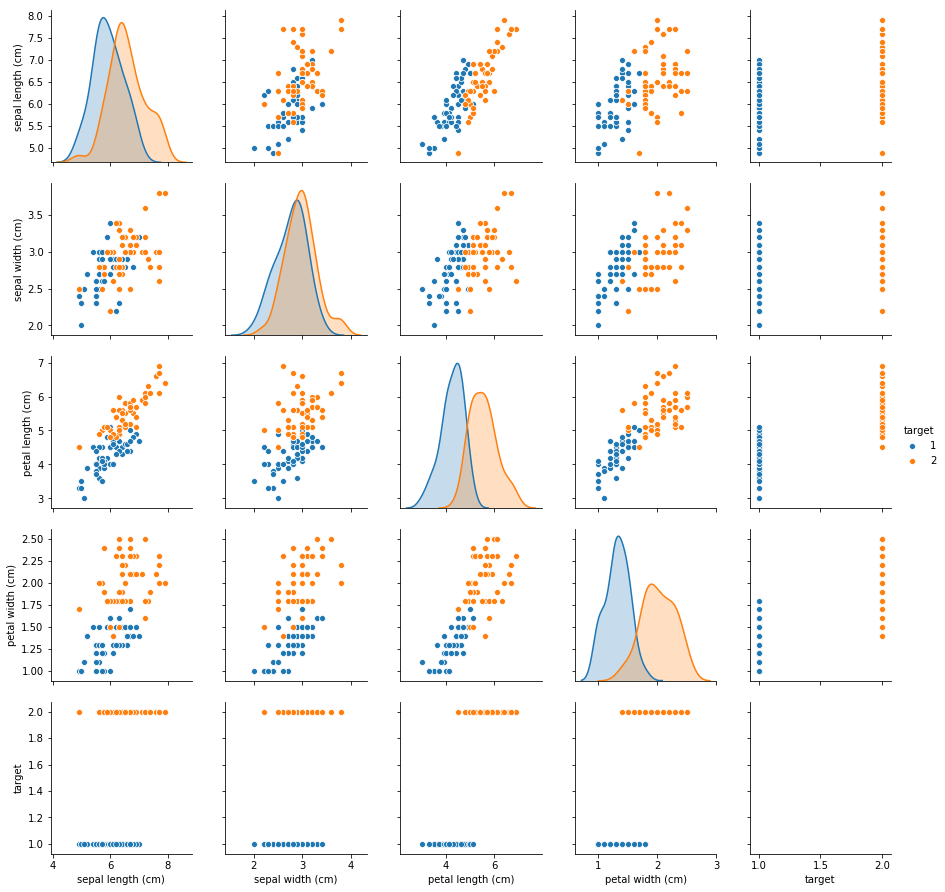

In [9]:
sns.pairplot(hue="target", data=iris_12.iloc[:, :5])

## Training - target未分群

In [3]:
from sklearn.svm import SVC, LinearSVC

In [29]:
X = iris.iloc[:, :4].values
y = iris["target"].values
model = LinearSVC(random_state=555)
model.fit(X=X, y=y)

C:\Users\lwanchi\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\svm\base.py:922: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


LinearSVC(C=1.0, class_weight=None, dual=True, fit_intercept=True,
     intercept_scaling=1, loss='squared_hinge', max_iter=1000,
     multi_class='ovr', penalty='l2', random_state=555, tol=0.0001,
     verbose=0)

# Mean accuracy (Returns the mean accuracy on the given test data and labels)

In [30]:
model.score(X=X, y=y)

0.9666666666666667

# Prediction (Returns predict targat when given X = [5.0,4.0,2.0,0.5])

In [31]:
predict_y = model.predict(X=X)
predict_y_test = model.predict([[5.0, 4.0, 2.0, 0.5]])
print(predict_y_test)

[0]


## Confusion matrix (Compute confusion matrix to evaluate the accuracy of a classification)

In [32]:
from sklearn import metrics
confmat = metrics.confusion_matrix(y, predict_y)
confmat

array([[50,  0,  0],
       [ 0, 47,  3],
       [ 0,  2, 48]], dtype=int64)

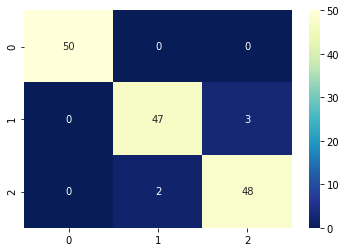

In [9]:
sns.heatmap(confmat, cmap="YlGnBu_r", annot=True, fmt="d")

In [10]:
report = metrics.classification_report(y, predict_y)
print(report)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        50
           1       0.96      0.94      0.95        50
           2       0.94      0.96      0.95        50

   micro avg       0.97      0.97      0.97       150
   macro avg       0.97      0.97      0.97       150
weighted avg       0.97      0.97      0.97       150



## Accuracy, precision and recall(以權重方式算出 precision與 recall 因目前target為 multiclass case)

In [23]:
accuracy = metrics.accuracy_score(y, predict_y)
precision = metrics.precision_score(y, predict_y, average='weighted')
recall = metrics.recall_score(y, predict_y, average='weighted')
print('accuracy =', accuracy,',','precision =', precision,',','recall =', recall)

accuracy = 0.9666666666666667 , precision = 0.9667867146858743 , recall = 0.9666666666666667


## Training SVC with different kernel - target未分群

In [17]:
import numpy as np
from sklearn import svm
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn.multiclass import OneVsRestClassifier
from scipy import interp

In [12]:
x = iris.iloc[:,:4]
y = iris.iloc[:,4]

# shuffle and split training and test sets
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=.5,random_state=555)
train = X_train.join(y_train)
test = X_test.join(y_test)

#train
#test


,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
31,5.4,3.4,1.5,0.4,0
42,4.4,3.2,1.3,0.2,0
119,6.0,2.2,5.0,1.5,2
136,6.3,3.4,5.6,2.4,2
104,6.5,3.0,5.8,2.2,2
131,7.9,3.8,6.4,2.0,2
122,7.7,2.8,6.7,2.0,2
106,4.9,2.5,4.5,1.7,2
45,4.8,3.0,1.4,0.3,0
26,5.0,3.4,1.6,0.4,0


## 視覺化 (training data set) 分別對萼片長寬與花瓣長寬畫圖

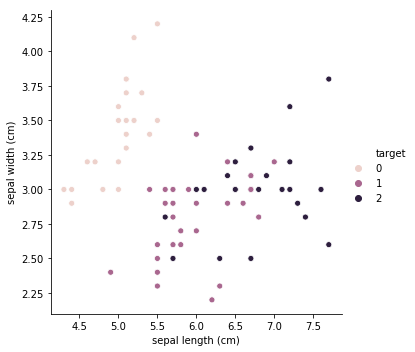

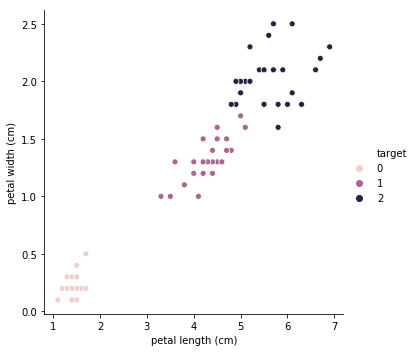

In [13]:
sns.relplot(x="sepal length (cm)", y="sepal width (cm)", hue="target", data=train)
sns.relplot(x="petal length (cm)", y="petal width (cm)", hue="target", data=train)

## 視覺化 (test data set) 分別對萼片長寬與花瓣長寬畫圖

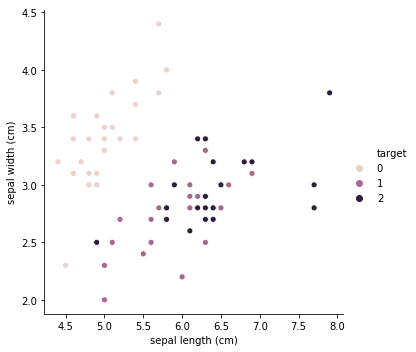

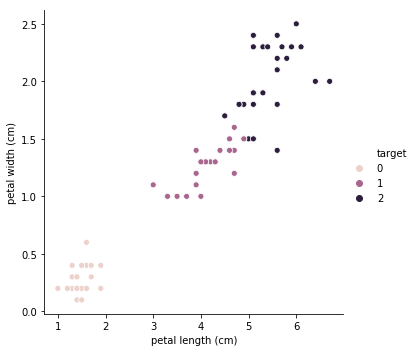

In [14]:
sns.relplot(x="sepal length (cm)", y="sepal width (cm)", hue="target", data = test)
sns.relplot(x="petal length (cm)", y="petal width (cm)", hue="target", data = test)

In [22]:
#標準化
train_std = preprocessing.scale(X_train)
test_std = preprocessing.scale(X_test)
print(train_std)
print('---------------------------------------------------')
print(test_std)

[[ 0.87370496 -1.36165488  1.0817602   0.75121601]
 [-1.00523043  1.82207056 -1.33151503 -1.41055668]
 [ 1.3434388  -0.1371451   1.13921913  1.15654839]
 [ 0.63883803  0.35265882  0.67954766  1.0214376 ]
 [-1.1226639   0.35265882 -1.56135077 -1.41055668]
 [-1.00523043  0.59756078 -1.2740561  -1.0052243 ]
 [-0.53549659  1.08736469 -1.50389183 -1.41055668]
 [-1.00523043  0.84246273 -1.38897396 -1.41055668]
 [ 0.05167072 -0.38204705  0.33479406  0.34588363]
 [-1.00523043  1.57716861 -1.38897396 -1.14033509]
 [-0.30062966 -0.62694901  0.33479406  0.07566204]
 [ 2.04803958 -1.11675293  1.71380847  1.42676997]
 [ 1.46087227 -0.1371451   1.0817602   0.48099442]
 [ 0.40397111 -1.36165488  0.62208873  0.8863268 ]
 [-1.1226639  -0.1371451  -1.33151503 -1.41055668]
 [-1.1226639   1.08736469 -1.50389183 -1.27544589]
 [ 0.99113842 -0.62694901  0.50717086  0.21077284]
 [ 0.63883803 -0.1371451   0.90938339  0.75121601]
 [-0.30062966 -0.1371451   0.16241725 -0.05944875]
 [ 1.10857188  0.10775686  0.85

In [51]:
svm_rbf = svm.SVC(kernel='rbf', probability=True, gamma='auto', random_state=555)
model = svm_rbf.fit(train_std,y_train)
score = model.score(train_std, np.array(y_train))
print('traning_score=', score)

traning_score= 0.9866666666666667


In [52]:
predict_y_train = model.predict(train_std)
accuracy = metrics.accuracy_score(predict_y_train, np.array(y_train))
precision = metrics.precision_score(predict_y_train, np.array(y_train), average='weighted')
recall = metrics.recall_score(predict_y_train, np.array(y_train), average='weighted')
print('traning_accuracy_score =', accuracy )
print('traning_precision_score =', precision )
print('traning_recall_score =', recall )

traning_accuracy_score = 0.9866666666666667
traning_precision_score = 0.987142857142857
traning_recall_score = 0.9866666666666667


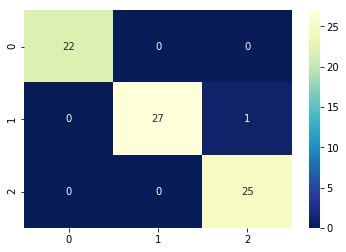

In [53]:
confmat_traning = metrics.confusion_matrix(y_train, predict_y_train)
sns.heatmap(confmat_traning , cmap="YlGnBu_r", annot=True, fmt="d")

In [55]:
report_traning = metrics.classification_report(y_train, predict_y_train)
print(report_traning)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        22
           1       1.00      0.96      0.98        28
           2       0.96      1.00      0.98        25

   micro avg       0.99      0.99      0.99        75
   macro avg       0.99      0.99      0.99        75
weighted avg       0.99      0.99      0.99        75



In [56]:
svm_rbf = svm.SVC(kernel='rbf', probability=True, gamma='auto', random_state=555)
model = svm_rbf.fit(test_std,y_test)
score = model.score(test_std, np.array(y_test))
print('test_score=', score)

test_score= 0.9733333333333334


In [57]:
predict_y_test = model.predict(test_std)
accuracy = metrics.accuracy_score(predict_y_test, np.array(y_test))
precision = metrics.precision_score(predict_y_test, np.array(y_test), average='weighted')
recall = metrics.recall_score(predict_y_test, np.array(y_test), average='weighted')
print('test_accuracy_score =', accuracy )
print('test_precision_score =', precision )
print('test_recall_score =', recall )

test_accuracy_score = 0.9733333333333334
test_precision_score = 0.9733333333333334
test_recall_score = 0.9733333333333334


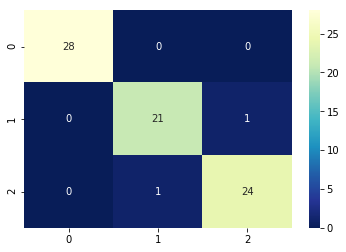

In [58]:
confmat_test = metrics.confusion_matrix(y_test, predict_y_test)
sns.heatmap(confmat_test , cmap="YlGnBu_r", annot=True, fmt="d")

In [59]:
report_test = metrics.classification_report(y_test, predict_y_test)
print(report_test)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        28
           1       0.95      0.95      0.95        22
           2       0.96      0.96      0.96        25

   micro avg       0.97      0.97      0.97        75
   macro avg       0.97      0.97      0.97        75
weighted avg       0.97      0.97      0.97        75



## Training SVC with different kernel - target(0,1)

In [62]:
X = iris_01.iloc[:, :4].values
y = iris_01["target"].values

In [63]:
model = LinearSVC(random_state=555)
model.fit(X=X, y=y)

LinearSVC(C=1.0, class_weight=None, dual=True, fit_intercept=True,
     intercept_scaling=1, loss='squared_hinge', max_iter=1000,
     multi_class='ovr', penalty='l2', random_state=555, tol=0.0001,
     verbose=0)

## Mean accuracy (target(0,1))

In [64]:
score = model.score(X=X, y=y)
print('score =',score)

score = 1.0


## Prediction & Confusion matrix (target(0,1))

[[50  0]
 [ 0 50]]


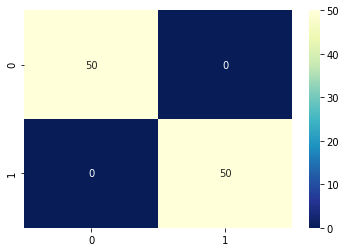

In [66]:
predict_y = model.predict(X=X)
confmat = metrics.confusion_matrix(y, predict_y)
print(confmat)
sns.heatmap(confmat, cmap="YlGnBu_r", annot=True, fmt="d")

## Classification report (target(0,1))

In [67]:
report = metrics.classification_report(y, predict_y)
print(report)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        50
           1       1.00      1.00      1.00        50

   micro avg       1.00      1.00      1.00       100
   macro avg       1.00      1.00      1.00       100
weighted avg       1.00      1.00      1.00       100



## Accuracy, precision and recall (target(0,1))

In [68]:
accuracy_score = metrics.accuracy_score(y, predict_y)
precision_score = metrics.precision_score(y, predict_y)
recall_score = metrics.recall_score(y, predict_y)

print('accuracy_score =',accuracy_score,',','precision_score = ',precision_score,',','recall_score =',recall_score)

accuracy_score = 1.0 , precision_score =  1.0 , recall_score = 1.0


## Training SVC with different kernel - target(0,2)

In [72]:
X = iris_02.iloc[:, :4].values
y = iris_02["target"].values

In [73]:
model = LinearSVC(random_state=555)
model.fit(X=X, y=y)

LinearSVC(C=1.0, class_weight=None, dual=True, fit_intercept=True,
     intercept_scaling=1, loss='squared_hinge', max_iter=1000,
     multi_class='ovr', penalty='l2', random_state=555, tol=0.0001,
     verbose=0)

## Mean accuracy (target(0,2))

In [74]:
score = model.score(X=X, y=y)
print('score =',score)

score = 1.0


## Prediction & Confusion matrix (target(0,2))

[[50  0]
 [ 0 50]]


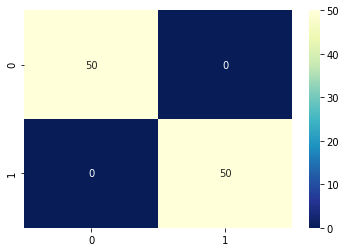

In [75]:
predict_y = model.predict(X=X)
confmat = metrics.confusion_matrix(y, predict_y)
print(confmat)
sns.heatmap(confmat, cmap="YlGnBu_r", annot=True, fmt="d")

## Classification report (target(0,2))

In [76]:
report = metrics.classification_report(y, predict_y)
print(report)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        50
           2       1.00      1.00      1.00        50

   micro avg       1.00      1.00      1.00       100
   macro avg       1.00      1.00      1.00       100
weighted avg       1.00      1.00      1.00       100



## Accuracy, precision and recall (target(0,2))

In [78]:
accuracy_score = metrics.accuracy_score(y, predict_y)
precision_score = metrics.precision_score(y, predict_y,average='weighted')
recall_score = metrics.recall_score(y, predict_y,average='weighted')

print('accuracy_score =',accuracy_score,',','precision_score = ',precision_score,',','recall_score =',recall_score)

accuracy_score = 1.0 , precision_score =  1.0 , recall_score = 1.0


## Training SVC with different kernel - target(1,2)

In [82]:
X = iris_12.iloc[:, :4].values
y = iris_12["target"].values

In [83]:
model = LinearSVC(random_state=555)
model.fit(X=X, y=y)

C:\Users\lwanchi\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\svm\base.py:922: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


LinearSVC(C=1.0, class_weight=None, dual=True, fit_intercept=True,
     intercept_scaling=1, loss='squared_hinge', max_iter=1000,
     multi_class='ovr', penalty='l2', random_state=555, tol=0.0001,
     verbose=0)

## Mean accuracy (target(1,2))

In [84]:
score = model.score(X=X, y=y)
print('score =',score)

score = 0.97


## Prediction & Confusion matrix (target(1,2))

[[47  3]
 [ 0 50]]


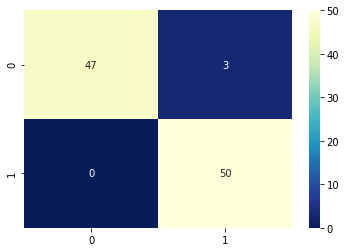

In [85]:
predict_y = model.predict(X=X)
confmat = metrics.confusion_matrix(y, predict_y)
print(confmat)
sns.heatmap(confmat, cmap="YlGnBu_r", annot=True, fmt="d")

## Classification report (target(1,2))

In [86]:
report = metrics.classification_report(y, predict_y)
print(report)

              precision    recall  f1-score   support

           1       1.00      0.94      0.97        50
           2       0.94      1.00      0.97        50

   micro avg       0.97      0.97      0.97       100
   macro avg       0.97      0.97      0.97       100
weighted avg       0.97      0.97      0.97       100



## Accuracy, precision and recall (target(1,2))

In [87]:
accuracy_score = metrics.accuracy_score(y, predict_y)
precision_score = metrics.precision_score(y, predict_y,average='weighted')
recall_score = metrics.recall_score(y, predict_y,average='weighted')

print('accuracy_score =',accuracy_score,',','precision_score = ',precision_score,',','recall_score =',recall_score)

accuracy_score = 0.97 , precision_score =  0.9716981132075472 , recall_score = 0.97
